In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipywidgets import interact

In [3]:

def read_data(path='data/last_data.data'):

    with open(path, 'rb') as file:
        temp = pickle.load(file)

    return temp

def load_btn_callback2(fname):
    d_list, _, _, _ = read_data('data/'+fname)

    return d_list

class PotentialShape():
    def __init__(self, L, W, V, cw=40):
        self.v_value = V
        self.L =L
        self.W = W
        self.center_x = int(self.L/2)
        self.center_y = int(self.W/2)
        self.width = 5
        self.a = 5
        self.canal_width = cw

    def single_barrier(self):
        Vtab = np.zeros((self.L, self.W))

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(self.W):
                Vtab[i,j] = self.v_value

        return Vtab

    def single_slit(self):
        Vtab = self.single_barrier()

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(int(self.W/2) - self.a, int(self.W/2) + self.a + 1):
                Vtab[i,j] = 0

        return Vtab
    def double_slit_wide(self):
        Vtab = self.single_barrier()

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(int(self.W/2) - 2*self.a - 8, int(self.W/2) + 2*self.a + 8 + 1):
                if j < int(self.W/2) - self.a or j > int(self.W/2) + self.a:
                    Vtab[i,j] = 0

        return Vtab

    def two_terminal_ring(self):
        Vtab = np.ones((self.L, self.W))
        Vtab = self.v_value * Vtab

        self.o_radius = 120
        self.i_radius = 80
        self.width = self.canal_width

        for i in range(self.center_x - self.o_radius, self.center_x + self.o_radius + 1):
            for j in range(self.center_y - self.o_radius, self.center_y + self.o_radius):
                if np.sqrt((i-self.center_x)**2 + (j-self.center_y)**2) > self.i_radius and np.sqrt((i-self.center_x)**2 + (j-self.center_y)**2) < self.o_radius:
                    Vtab[i, j] = 0

        for i in range(0, self.L):
            for j in range(self.center_y - int(self.width/2), self.center_y + int(self.width/2)):
                if i < self.center_x - self.i_radius or i > self.center_x + self.i_radius:
                    Vtab[i,j] = 0

        return Vtab

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
data_list = load_btn_callback2("cyklotron_480pktdt20.data")

L = 400
W = 400
x_gate = 400
#Vtab = PotentialShape(400, 400, 8*0.5).double_slit_wide()
Vtab = []
x_list = np.linspace(0, L, L)
y_list = np.linspace(0, W, W)

X, Y = np.meshgrid(x_list,y_list)

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm

def norm(index=0):
    suma = data_list[index].copy()
    suma = (np.abs(suma)**2)
    suma = np.sum(suma)

    return suma

def plot_function(index = 0):


    Z = np.resize(data_list[index], (L,W))
    Z = Z.transpose()
    Z = np.abs(Z*Z.conj())
    Z = normalize(Z)
    #Vt = normalize(Vtab)

    #Z2 = Z + 4*Vt.transpose()

    plt.style.use("seaborn-colorblind")
    plt.rcParams['font.family'] = 'sans-serif'

    plt.title("Double", fontsize=15)
    plt.xlabel("x [a]", fontweight="bold", fontsize=15)
    plt.ylabel("y [a]", fontweight="bold", fontsize=15)

    #plt.grid()
    
    plt.contour(X,Y,Z, colors="black", alpha=0.3, levels=20)
    plt.imshow(Z,extent=[0,L,0,W],origin="lower", cmap ="OrRd")
    #plt.imshow(Vtab.transpose(), extent=[0,400,0,400],origin="lower", cmap="gray_r")

    #plt.axvline(x_gate, ymin=0, ymax=1, c="r", label="gate")

    #plt.ylim(75, 325)
    #plt.xlim(75, 325)

    #plt.savefig('visualizations/double_slit_wide.png', dpi=200, bbox_inches='tight')
    plt.show()
interact(plot_function, index=(0,len(data_list), 1))



interactive(children=(IntSlider(value=0, description='index', max=481), Output()), _dom_classes=('widget-inter…

<function __main__.plot_function(index=0)>

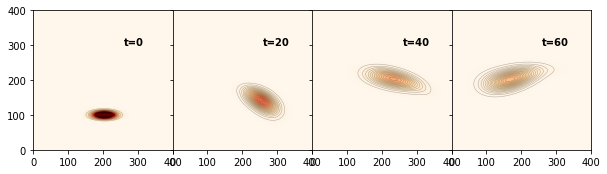

In [6]:
data_list = load_btn_callback2("cyklotron_480pktdt20.data")
def plot_multiple_function(index_list=[]):

    fig, axs = plt.subplots(1,4, sharex=True, sharey=True, gridspec_kw={'wspace': 0})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.style.use("seaborn-colorblind")
    #plt.ylabel("y [a]", fontweight="bold", fontsize=15)
    #plt.xlabel("x [a]", fontweight="bold", fontsize=15)

    for i, index in enumerate(index_list):

        Z = np.resize(data_list[index], (400,400))
        Z = Z.transpose()
        Z = np.abs(Z*Z.conj())
        #Z = normalize(Z)
        #Vt = normalize(Vtab)

        #Z2 = Z + 4*Vt.transpose()

        #plt.subplot(1,4,i+1)
        #plt.title("Double", fontsize=15)


        axs[i].contour(X,Y,Z, colors="black", alpha=0.3, levels=20, linewidths=0.5)
        axs[i].imshow(Z,extent=[0,400,0,400],origin="lower", cmap ="OrRd", vmin=0, vmax=float(0.0005))
        #plt.imshow(Vtab.transpose(), extent=[0,400,0,400],origin="lower", cmap="gray_r")

        #plt.ylim(75, 325)
        #plt.xlim(75, 325)
        axs[i].text(260,300, "t="+str(index),
                    horizontalalignment='left',
                    size='medium',
                    weight="bold")

    for ax in axs:
        ax.label_outer()
    #plt.savefig('visualizations/singlebarrier.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_multiple_function([0,20,40,60])

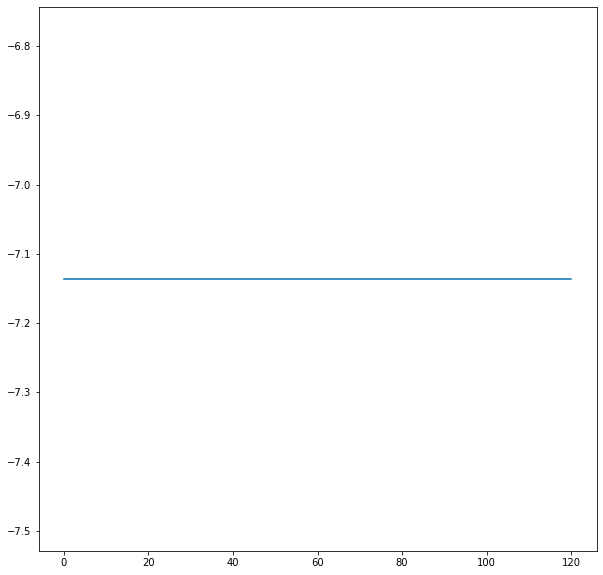

In [7]:
#norm
norm_list = [norm(index) for index in range(len(data_list))]
plt.plot(np.log(norm_list) )


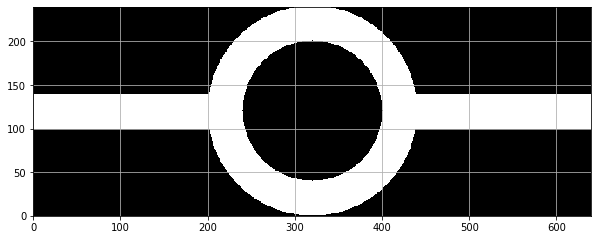

In [11]:
#potential
plt.rcParams["figure.figsize"] = (10,10)
L = 640
W = 240
Vtab = PotentialShape(L, W, 1, 40).two_terminal_ring()


plt.imshow(Vtab.transpose(), extent=[0,L,0,W],origin="lower", cmap="gray_r")
plt.grid()
plt.show()

